# Scikit-Learn Jupyter Notebook

[Offical Documentation](https://scikit-learn.org/stable/)

***

## Python libaries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

## Plot styles 

In [2]:
#default plot style
plt.style.use('fivethirtyeight')

#default plot size
plt.rcParams['figure.figsize'] = [12, 6]

***

### Building a k-Nearest-Neighbors (k-NN) Model with Scikit-learn

* https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

[link to aticle](https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a)

#### Reading in dataset

In [3]:
import pandas as pd

#read in the data using pandas
df = pd.read_csv('F:\Desktop\HDip\Machine_Learning\Data\diabetes_data.txt')

#check data has been read in properly
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


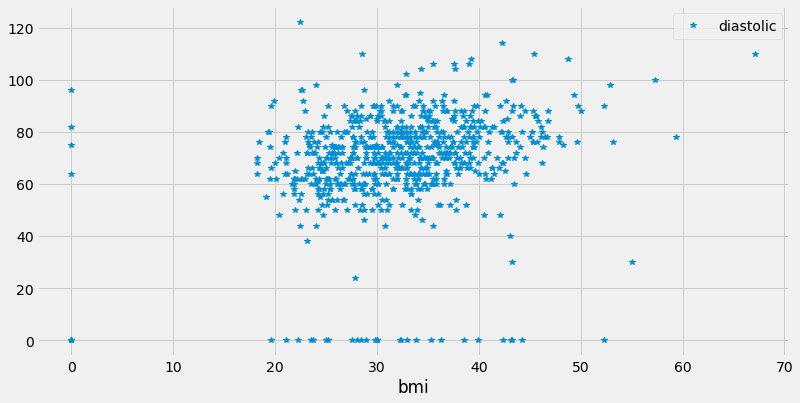

In [4]:
df.plot(x='bmi',y='diastolic',style='*');

#### How much data there is - number of rows and columns

In [5]:
df.shape

(768, 9)

#### Split up the dataset into inputs and targets
The input will be every column except ‘diabetes’ because ‘diabetes’ is what we will be attempting to predict. 
Therefore, ‘diabetes’ will be our target.

In [6]:
#create a dataframe with all training data except the target column
X = df.drop(columns=["diabetes"])
#check that the target variable has been removed
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Insert the ‘diabetes’ column of our dataset into our target variable (y).

In [7]:
#separate target values
y = df['diabetes'].values
#view target values
y[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

#### Split the dataset into train and test data
Now we will split the dataset into into training data and testing data. The training data is the data that the model will learn from. The testing data is the data we will use to see how well the model performs on unseen data.

In [8]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

#### train_test_split function explanation
* takes in 5 parameters. 

* The first two parameters are the input and target data we split up earlier. 

* ‘test_size’ to 0.2. This means that 20% of all the data will be used for testing, which leaves 80% of the data as training data for the model to learn from. 

* Setting ‘random_state’ to 1 ensures that we get the same split each time so we can reproduce our results.

* Setting ‘stratify’ to y makes our training split represent the proportion of each value in the y variable. For example, in our dataset, if 25% of patients have diabetes and 75% don’t have diabetes, setting ‘stratify’ to y will ensure that the random split has 25% of patients with diabetes and 75% of patients without diabetes.

#### Building and training the model

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier()
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier()

* First, we will create a new k-NN classifier and set ‘n_neighbors’ to 3. To recap, this means that if at least 2 out of the 3 nearest points to an new data point are patients without diabetes, then the new data point will be labeled as ‘no diabetes’, and vice versa. In other words, a new data point is labeled with by majority from the 3 nearest points.

* We have set ‘n_neighbors’ to 3 as a starting point. We will go into more detail below on how to better select a value for ‘n_neighbors’ so that the model can improve its performance.

* Next, we need to train the model. In order to train our new model, we will use the ‘fit’ function and pass in our training data as parameters to fit our model to the training data.

#### Testing the model

* Once the model is trained, we can use the ‘predict’ function on our model to make predictions on our test data. 

* As seen when inspecting ‘y’ earlier, 0 indicates that the patient does not have diabetes and 1 indicates that the patient does have diabetes. 

* To save space, we will only show print the first 5 predictions of our test set.

In [10]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

* model predicted ‘no diabetes’ for the first 4 patients in the test set and ‘has diabetes’ for the 5th patient.

* let’s see how our accurate our model is on the full test set. 

* use the ‘score’ function and pass in our test input and target data to see how well our model predictions match up to the actual results.

In [11]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.7012987012987013

#### k-Fold Cross-Validation

* Cross-validation is when the dataset is randomly split up into ‘k’ groups. 
* One of the groups is used as the test set and the rest are used as the training set. 
* The model is trained on the training set and scored on the test set. 
* Then the process is repeated until each unique group as been used as the test set.
* For example, for 5-fold cross validation, the dataset would be split into 5 groups, and the model would be trained and tested 5 separate times so each group would get a chance to be the test set.

* The train-test-split method we used in earlier is called ‘holdout’. 
* Cross-validation is better than using the holdout method because the holdout method score is dependent on how the data is split into train and test sets. * Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data.

* In order to train and test our model using cross-validation, we will use the ‘cross_val_score’ function with a cross-validation value of 5. * ‘cross_val_score’ takes in our k-NN model and our data as parameters. Then it splits our data into 5 groups and fits and scores our data 5 seperate times, recording the accuracy score in an array each time. 
* We will save the accuracy scores in the ‘cv_scores’ variable.
* To find the average of the 5 scores, we will use numpy’s mean function, passing in ‘cv_score’. Numpy is a useful math library in Python.

In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=14)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.75974026 0.72077922 0.75974026 0.81045752 0.73856209]
cv_scores mean:0.7578558696205755


* Using cross-validation, our mean score is about 71.36%. 
* This is a more accurate representation of how our model will perform on unseen data than our earlier testing using the holdout method.

#### Hypertuning model parameters using GridSearchCV
* When built our initial k-NN model, we set the parameter ‘n_neighbors’ to 3 as a starting point with no real logic behind that choice.
* Hypertuning parameters is when you go through a process to find the optimal parameters for your model to improve accuracy. 
* In our case, we will use GridSearchCV to find the optimal value for ‘n_neighbors’.
* GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.
* For our model, we will specify a range of values for ‘n_neighbors’ in order to see which value works best for our model. 
* To do this, we will create a dictionary, setting ‘n_neighbors’ as the key and using numpy to create an array of values from 1 to 24.
* Our new model using grid search will take in a new k-NN classifier, our param_grid and a cross-validation value of 5 in order to find the optimal value for ‘n_neighbors’.

In [13]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [14]:
knn_gscv

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

* After training, we can check which of our values for ‘n_neighbors’ that we tested performed the best. 
* To do this, we will call ‘best_params_’ on our model.

In [15]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 14}

* We can see that 14 is the optimal value for ‘n_neighbors’. 
* We can use the ‘best_score_’ function to check the accuracy of our model when ‘n_neighbors’ is 14. ‘best_score_’ outputs the mean accuracy of the scores obtained through cross-validation.

In [16]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7578558696205755

* By using grid search to find the optimal parameter for our model, we have improved our model accuracy by over 4%!

***

### KNN nearest neightbours Iris

* load in iris data set

In [17]:
#load iris dataset
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/master/iris.csv")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


* visualise with pairplot, hue being species

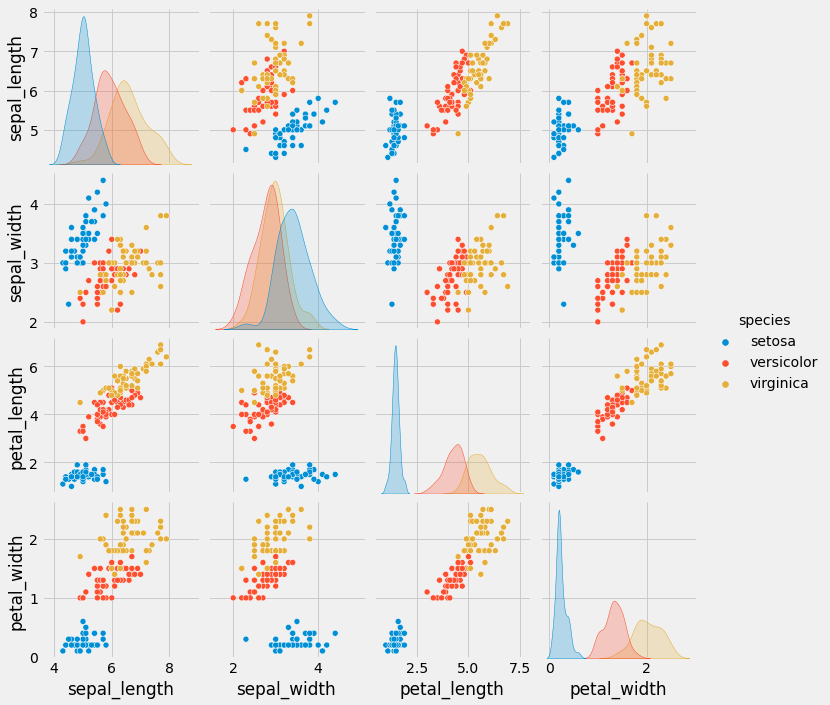

In [18]:
sns.pairplot(df,hue="species");

### Inputs and Outputs

* Data being split up into inouts and targets. 
* The species type is what is trying to be predicted. 
* This is takien out of the main dateaet simailar to the article above based on doabetes data

In [19]:
inputs= df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
outputs = df['species']

### Classifier

In [20]:
knn = KNeighborsClassifier(n_neighbors = 6)

### Fit

In [21]:
knn.fit(inputs,outputs)

KNeighborsClassifier(n_neighbors=6)

### Test fit

In [22]:
print(df.loc[5])
print('')
print(df.loc[120])

sepal_length       5.4
sepal_width        3.9
petal_length       1.7
petal_width        0.4
species         setosa
Name: 5, dtype: object

sepal_length          6.9
sepal_width           3.2
petal_length          5.7
petal_width           2.3
species         virginica
Name: 120, dtype: object


In [23]:
knn.predict([[5.4,3.9,1.7,0.4],[6.9,3.2,5.7,2.3]])

array(['setosa', 'virginica'], dtype=object)

### Evaluate

In [24]:
(knn.predict(inputs) == outputs).sum()

146

In [25]:
(knn.predict(inputs) == outputs).value_counts()

True     146
False      4
Name: species, dtype: int64

### Train data

In [26]:
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs,outputs,test_size=0.33)

In [27]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(inputs_train,outputs_train)

KNeighborsClassifier(n_neighbors=6)

In [28]:
(knn.predict(inputs_test) == outputs_test).sum()


48

In [29]:
(knn.predict(inputs_test) == outputs_test).value_counts()
df['pred'] =knn.predict(inputs)
df['c'] = df['species'] == df['pred']
(df['species'] == df['pred']).sum()
df.loc[df['c']==False]

,sepal_length,sepal_width,petal_length,petal_width,species,pred,c
77,6.7,3.0,5.0,1.7,versicolor,virginica,False
83,6.0,2.7,5.1,1.6,versicolor,virginica,False
106,4.9,2.5,4.5,1.7,virginica,versicolor,False
127,6.1,3.0,4.9,1.8,virginica,versicolor,False
133,6.3,2.8,5.1,1.5,virginica,versicolor,False
138,6.0,3.0,4.8,1.8,virginica,versicolor,False


### k-Fold Cross-Validation

In [30]:
from sklearn.model_selection import cross_val_score

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, inputs,outputs, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.96666667 1.         0.93333333 0.96666667 1.        ]
cv_scores mean:0.9733333333333334


### GridSearch

In [31]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn3 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn3, param_grid, cv=5)
#fit model to data
knn_gscv.fit(inputs,outputs)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

#### Best value to use

In [32]:
knn_gscv.best_params_

{'n_neighbors': 6}

* n_neightbour value of 6 the optium value to use post cross validation

In [33]:
knn_gscv.best_score_

0.9800000000000001

In [34]:
knn_gscv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [35]:
for i in ['mean_test_score', 'rank_test_score', 'params']:
    print(i," : ",knn_gscv.cv_results_[i])

mean_test_score  :  [0.96       0.94666667 0.96666667 0.97333333 0.97333333 0.98
 0.98       0.96666667 0.97333333 0.98       0.98       0.98
 0.97333333 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96       0.96666667 0.96       0.96       0.94666667]
rank_test_score  :  [19 24 10  6  6  1  1 10  6  1  1  1  6 17 10 10 10 17 10 19 10 19 19 23]
params  :  [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}, {'n_neighbors': 20}, {'n_neighbors': 21}, {'n_neighbors': 22}, {'n_neighbors': 23}, {'n_neighbors': 24}]


***

# Red Wine Quality Analysis

### Import Libaries

In [36]:
import pandas as pd

In [37]:
url ="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

df = pd.read_csv(url,sep=';')

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


#### Datasset Columns overview

1. fixed acidity: non volatile acids that do not evaportate easily
2. volatile acidity: acetic acid content which leading to an unpleasant vinegar taste
3. citric acid: acts as a preservative to increase aciditiy (small qunatities and freshness and flavour)
4. residual sugar: amount of sugar remaining after fermentation
5. chlorides: amount of salt
6. free sulfur dioxide: prevent microbial growth and oxidation of wine
7. total sulfur dioxide: amount of SO2
8. density: sweeter wines have a higher density
9. pH: level of acidity
10. sulphates: wine additive that contributes to SO2 levels and acts as a antimicrobial and antioxidant
11. alcohol: amount of alchol in wine

***

* Output variable (based on sensory data):
12. quality (score between 0 and 10) target columns

***

In [38]:
df.shape

(1599, 12)

### Data Inspection

In [39]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Descriptive Statistics

a lot of variation between means and st dev

In [40]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Libaries for graphing and visualisation

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [42]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [43]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

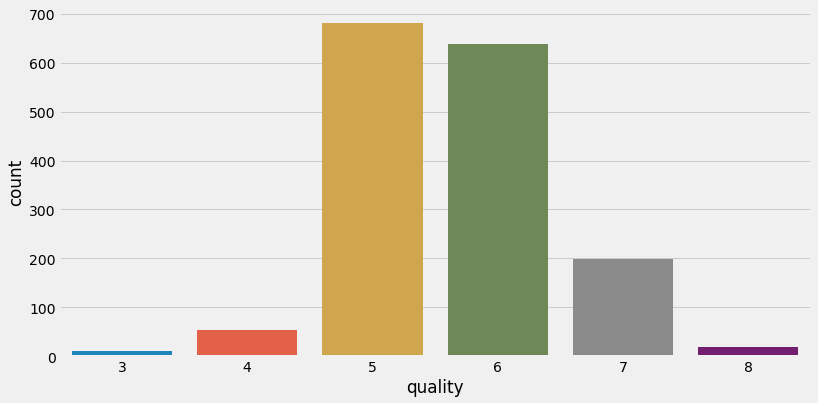

In [44]:
sns.countplot(x='quality',data=df);

#### loop through to see qulaity vs each variable

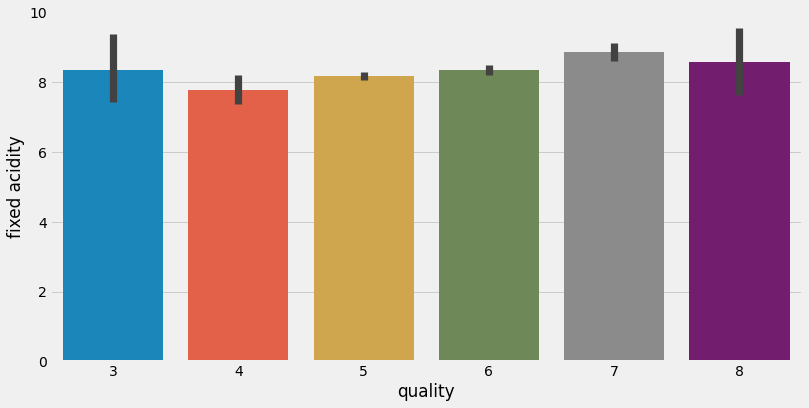

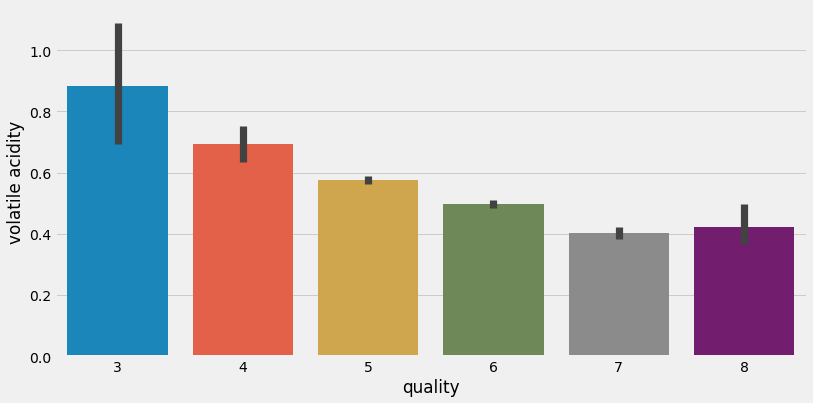

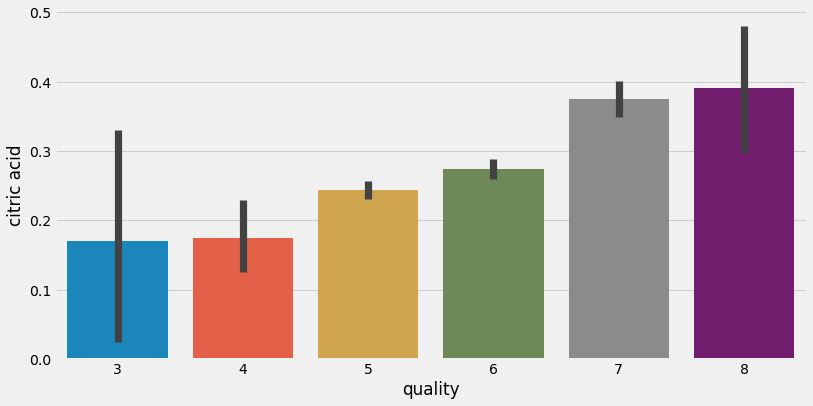

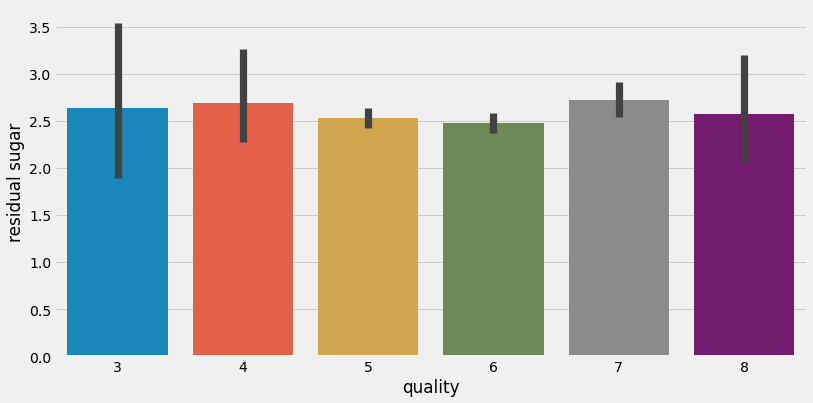

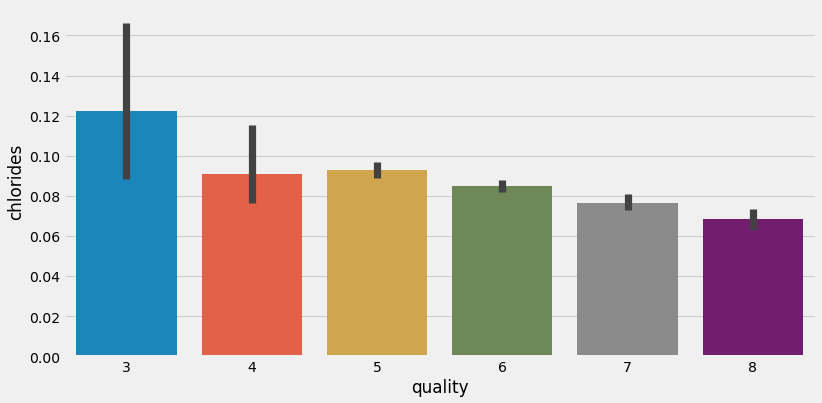

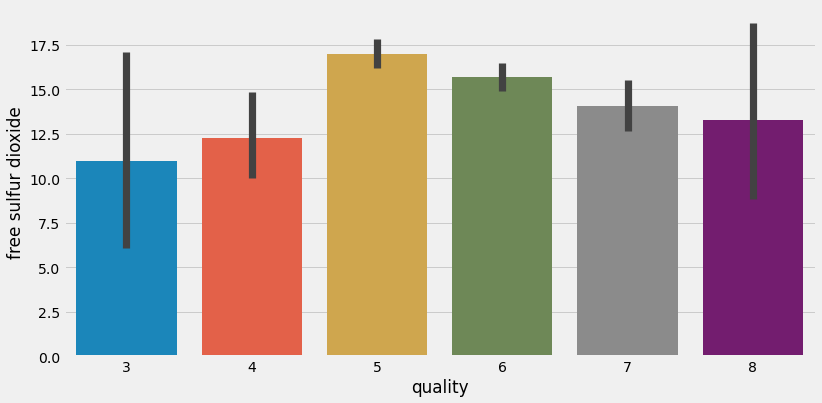

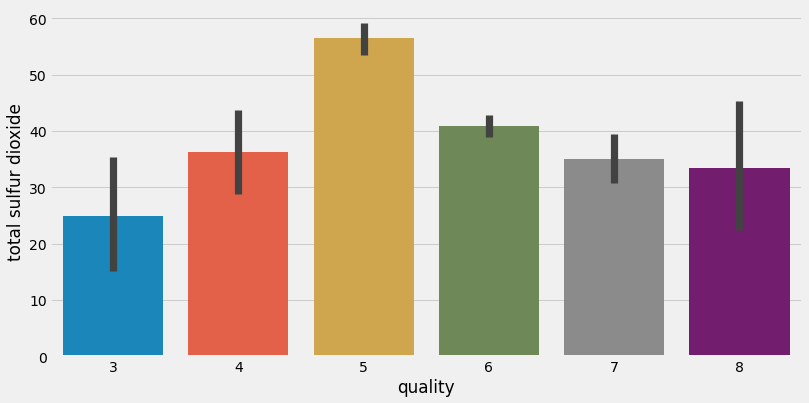

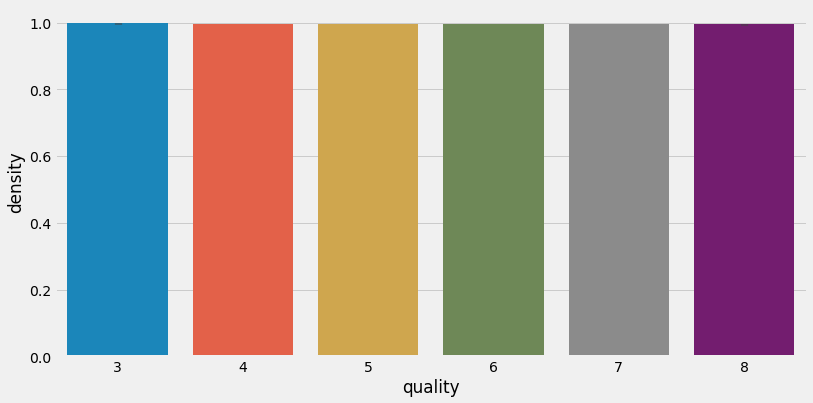

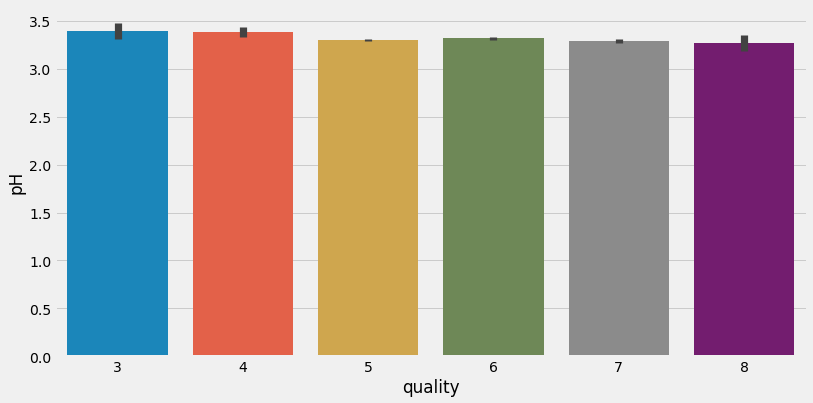

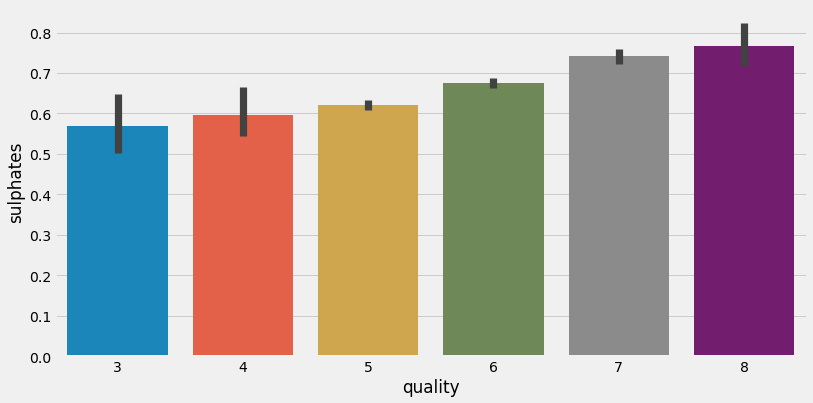

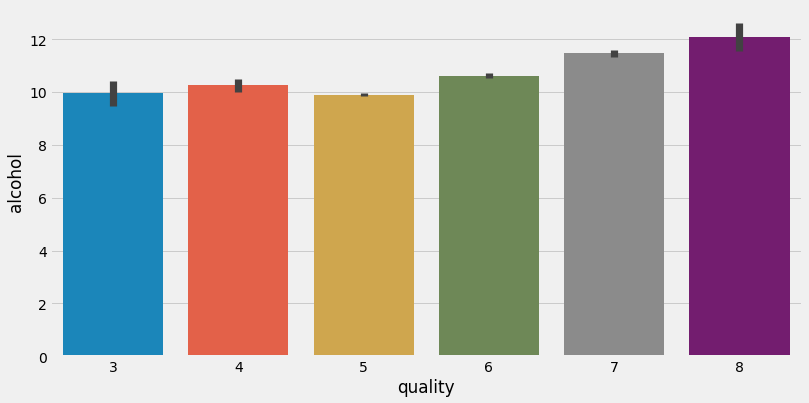

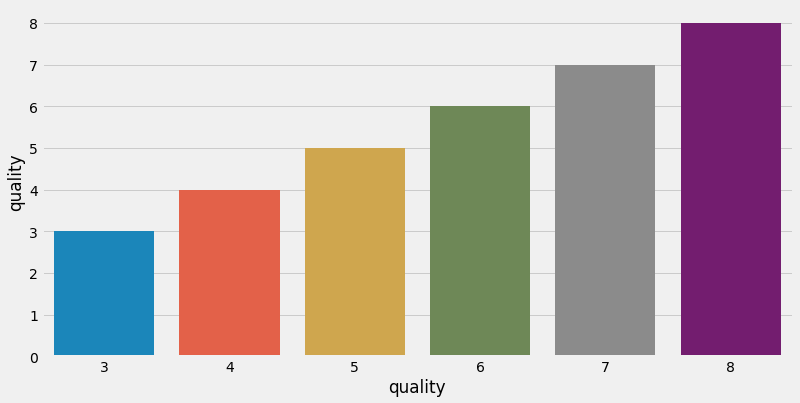

In [45]:
#col = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

for i, col in enumerate(df):
    plt.figure(i)
    sns.barplot(x='quality',y=col,data=df);

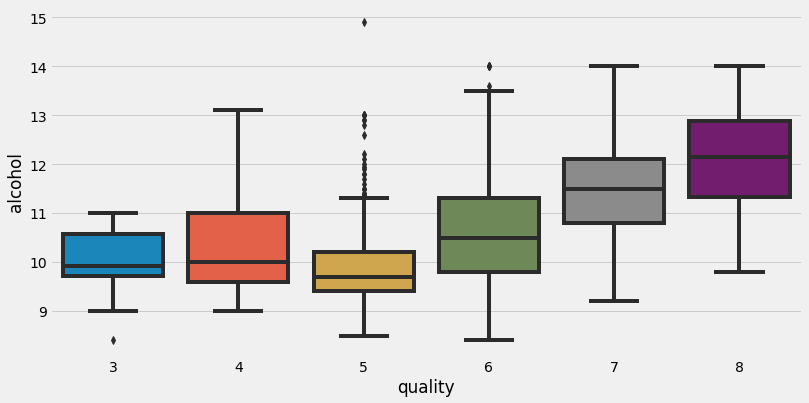

In [46]:
sns.boxplot(x='quality',y='alcohol',data=df);

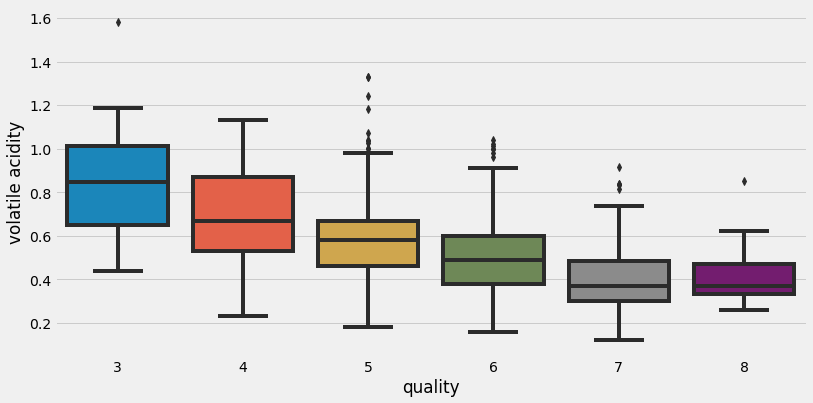

In [47]:
sns.boxplot(y='volatile acidity',x='quality',data=df);

#### Correrlation Matrix

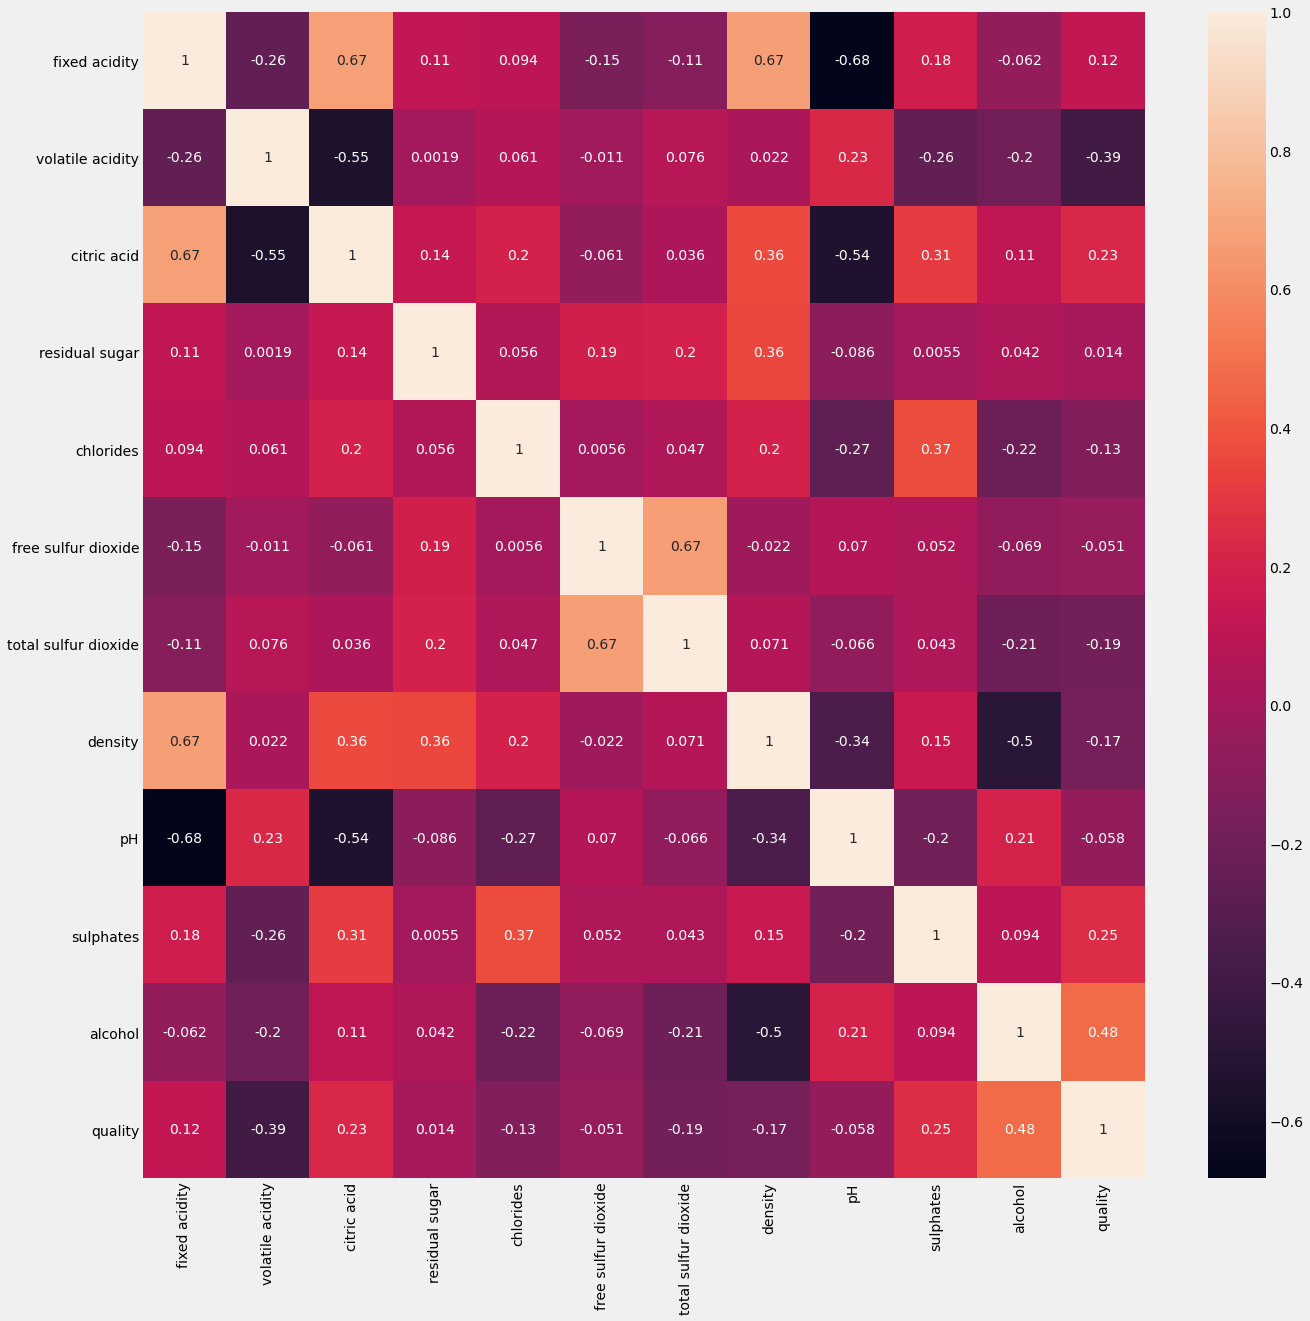

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True);

#### Correrlation Matrix

Following feature are relatively correlated:

* total sulfur dixoide and free sulfur dioxide
* fixed acidity and citric acid
* alcohol and quality

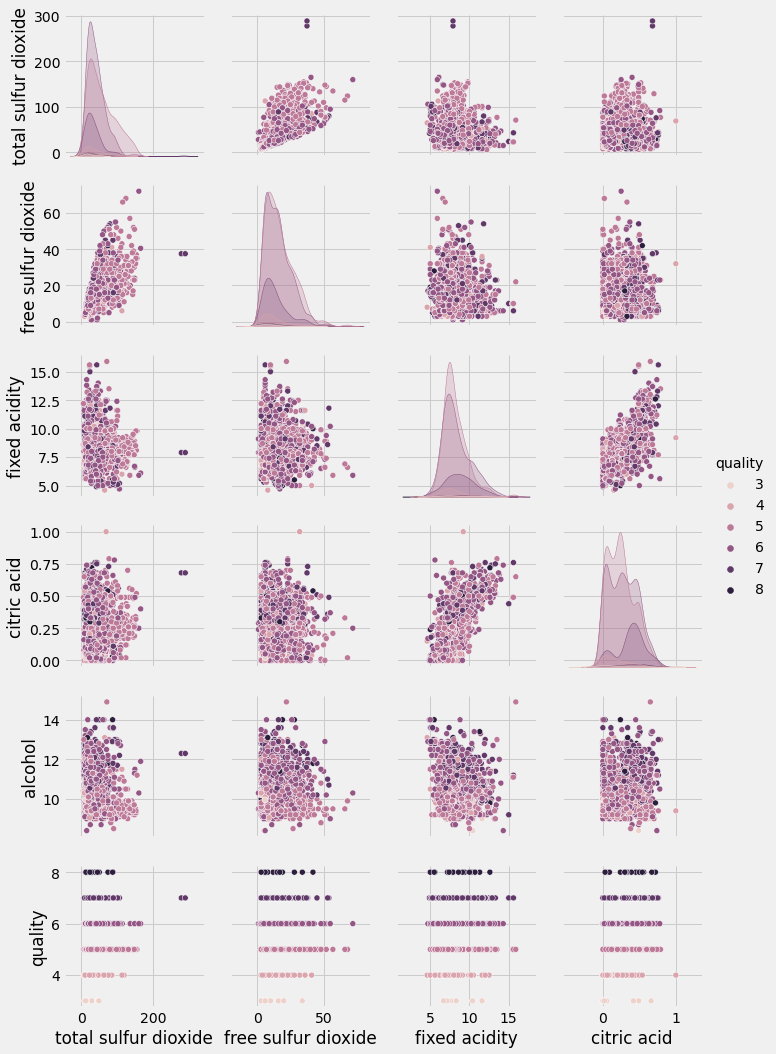

In [49]:
sns.pairplot(df,y_vars=['total sulfur dioxide','free sulfur dioxide','fixed acidity','citric acid','alcohol','quality'],x_vars=['total sulfur dioxide','free sulfur dioxide','fixed acidity','citric acid'],hue='quality')

### Classification Bins

In [50]:
bins = (2,6.5,8)
group_names = ['bad','good']
df['quality'] = pd.cut(df['quality'],bins= bins, labels = group_names)

In [51]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#### classification into ones and zeros using label encoder()

bad and good are not good assinged a numeric label. labelencoder allows for this



In [52]:
label_quality = LabelEncoder()

df['quality'] = label_quality.fit_transform(df['quality'])

In [53]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


#### setting the dependent and independent variables. Inputs and outputs

seperating dataset inputs and outputs


In [54]:
Y = df.quality
X = df.drop('quality',axis = 1)

#### split train and test

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2,random_state=0)

#### Scaling the data to take into account variations in mean and st dev

In [56]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Function for diff models

In [57]:
def models(X_train,Y_train):
    #logisitc regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    #knn neighbours
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,Y_train)
    
    #svc
    from sklearn.svm import SVC
    svc = SVC(kernel='linear',random_state=0)
    svc.fit(X_train,Y_train)
    
    #Gaussian NB
    from sklearn.naive_bayes import GaussianNB
    gb = GaussianNB()
    gb.fit(X_train,Y_train)
    
    #decisiontree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train,Y_train)
    
    #random forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0)
    forest.fit(X_train,Y_train)
    
    #print accuarcy
    print('1. Logistic Regression Accuarcy: ',log.score(X_train,Y_train))
    print('2. KNN Accuarcy: ',knn.score(X_train,Y_train))
    print('3. Support Vector Machine (linear classifier) SVM Accuarcy: ',svc.score(X_train,Y_train))
    print('4. Gaussian Accuarcy: ',gb.score(X_train,Y_train))
    print('5. Decision Tree Accuarcy: ',tree.score(X_train,Y_train))
    print('6. Random Forest Accuarcy: ',forest.score(X_train,Y_train))
    
    return log, knn, svc, gb, tree, forest
    

In [58]:
model =models(X_train,Y_train)


1. Logistic Regression Accuarcy:  0.8733385457388585
2. KNN Accuarcy:  0.9366692728694292
3. Support Vector Machine (linear classifier) SVM Accuarcy:  0.8537920250195465
4. Gaussian Accuarcy:  0.8358092259577795
5. Decision Tree Accuarcy:  1.0
6. Random Forest Accuarcy:  1.0


In [59]:
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm = confusion_matrix(Y_test,model[i].predict(X_test))
    TN, FP, FN, TP = confusion_matrix(Y_test,model[i].predict(X_test)).ravel()
    print(cm)
    print('Testing accuracy: ',(TN + TP)/(TP+TN+FN+FP))
    print()

[[277  13]
 [ 18  12]]
Testing accuracy:  0.903125

[[272  18]
 [ 11  19]]
Testing accuracy:  0.909375

[[290   0]
 [ 30   0]]
Testing accuracy:  0.90625

[[240  50]
 [  6  24]]
Testing accuracy:  0.825

[[267  23]
 [  7  23]]
Testing accuracy:  0.90625

[[282   8]
 [ 13  17]]
Testing accuracy:  0.934375



## Regression

***

### Simple Linear Regression

$$ y = 2 x + 1$$

The number $m$ is the slope if the line. The slope is how much $y$ increases by when $x$ is increased by 1.0. The $c$ is the y-intercept of the line. It is the value of $y$ when $x$ is at zero.

A simple linear regression estimates the relationship between the values. In the following dataset this is speed and power. Performing a linear regression on this dataset we can identify how strong the relationship is between these two variables. Power is dependent on Speed (independent).

***

##### Read in Dataset

In [60]:
#import dataset
ps = pd.read_csv('datasets/powerproduction.txt')

##### Summary Stats of Dataset

In [61]:
#summarry statistics
ps.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


##### Data types in dataset

In [62]:
#datatypes
ps.dtypes

speed    float64
power    float64
dtype: object

##### Shape of dataset

- 500 rows and two columns

In [63]:
ps.shape

(500, 2)

##### Plotting the Data

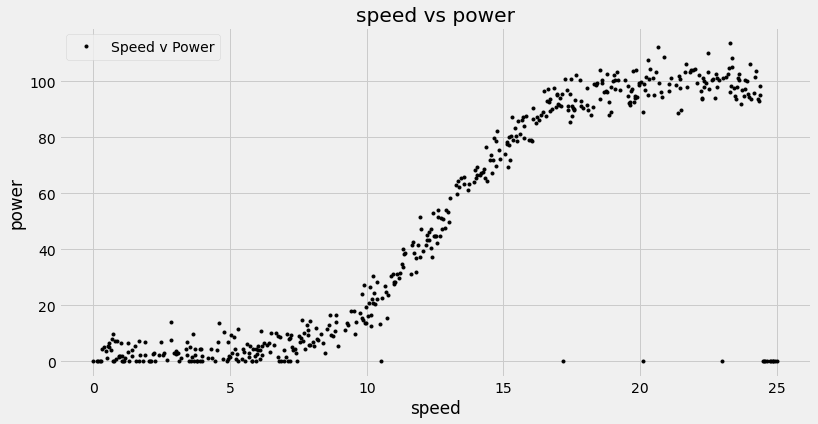

In [64]:
#plotting the dataset
plt.plot(ps['speed'],ps['power'],'.',color='black',label = 'Speed v Power')
plt.title(f'{ps.columns[0]} vs {ps.columns[1]}')
plt.xlabel(f'{ps.columns[0]}')
plt.ylabel(f'{ps.columns[1]}')
plt.legend();

##### Split up the dataset into inputs and targets

In [65]:
X = ps['speed'].values
y = ps['power'].values

X = X.reshape(-1, 1)

##### Split data into training and test sets

- 33% of the data held back in test dataset

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.33,random_state=1)

In [67]:
print(f'Length of Training dataset is {len(X_train)}')
print(f'Length of Test dataset is {len(X_test)}')
print(f'Together that sums up to the total length of the oroignal data set: {len(X_train)+len(X_test)}')

Length of Training dataset is 335
Length of Test dataset is 165
Together that sums up to the total length of the oroignal data set: 500


##### Import sklearn linear model

In [68]:
import sklearn.linear_model as lm

##### Fitting the model

In [69]:
model = lm.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

##### Model score and predictions

In [70]:
print(f'Model has an accuarcy score of {model.score(X_train, y_train)}')

y_pred = model.predict(X_test)

Model has an accuarcy score of 0.7583097942482523


In [71]:
from sklearn import metrics

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 15.859576087684802
Mean Squared Error: 582.959613994422
R2 Score: 0.6681116694185654


##### For comparison Dataframe

In [72]:
m1_score = model.score(X_train, y_train)
m1_mae = metrics.mean_absolute_error(y_test,y_pred)
m1_mse = metrics.mean_squared_error(y_test,y_pred)
m1_r2 = metrics.r2_score(y_test,y_pred)
m1_rmse = np.sqrt(m1_mse)
print(m1_rmse)

24.144556612090064


##### Fitting Best Line

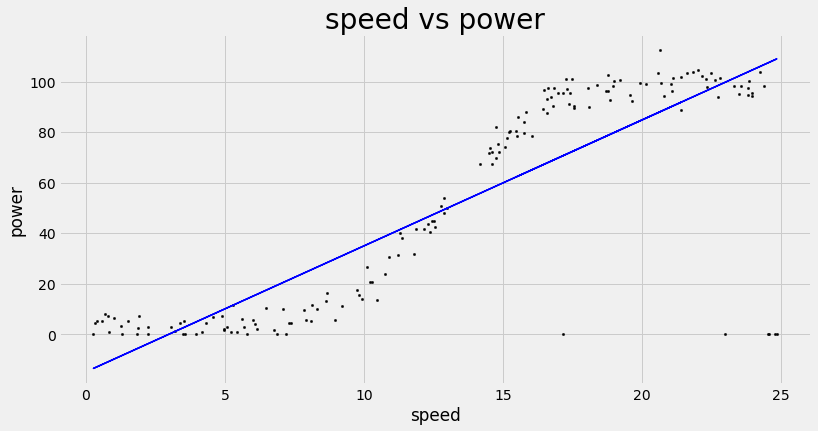

In [73]:
plt.scatter(X_test,y_test,color='black',s=5)
plt.plot(X_test,y_pred,color='blue',linewidth=1.5)
plt.title(f'{ps.columns[0]} vs {ps.columns[1]}',fontsize=28)
plt.xlabel(f'{ps.columns[0]}')
plt.ylabel(f'{ps.columns[1]}');

#### Outliers

There are a number of zero values for power when speed is greater than zero. We may view these as outliers, incorrect measurements or some anomoly in the data. We will fit a line with and without these values and look at the comparison. A new dataset will be created removing these outliers


In [74]:
#remove outliers
ps_c = ps[ps['power']!=0].reset_index()


##### Plot of data without zero values

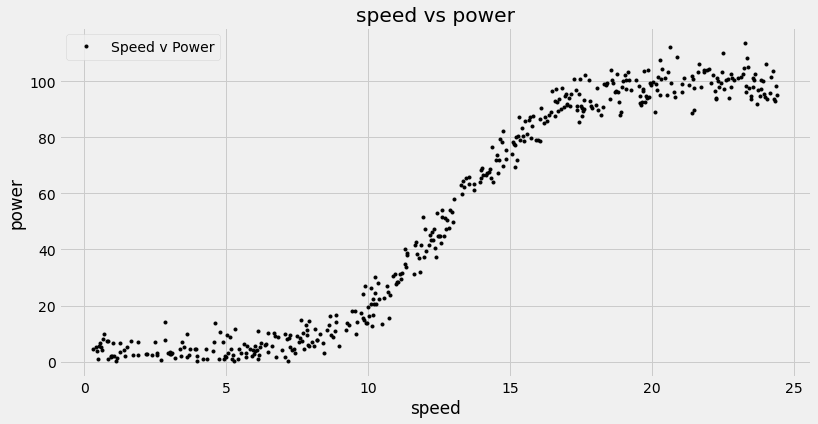

In [75]:
#plotting the dataset
plt.plot(ps_c['speed'],ps_c['power'],'.',color='black',label = 'Speed v Power')
plt.title(f'{ps_c.columns[1]} vs {ps_c.columns[2]}')
plt.xlabel(f'{ps_c.columns[1]}')
plt.ylabel(f'{ps_c.columns[2]}')
plt.legend();

##### Split up the dataset into inputs and targets

In [76]:
X = ps_c['speed'].values
y = ps_c['power'].values

X = X.reshape(-1, 1)

##### Split data into training and test sets

- 33% of the data held back in test dataset

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.33,random_state=1)

In [78]:
print(f'Length of Training dataset is {len(X_train)}')
print(f'Length of Test dataset is {len(X_test)}')
print(f'Together that sums up to the total length of the oroignal data set: {len(X_train)+len(X_test)}')

Length of Training dataset is 302
Length of Test dataset is 149
Together that sums up to the total length of the oroignal data set: 451


##### Fitting the model

In [79]:
model2 = lm.LinearRegression()

model2.fit(X_train, y_train)

LinearRegression()

##### Model score and predictions

In [80]:
print(f'Model has an accuarcy score of {model.score(X_train, y_train)}')

y_pred = model.predict(X_test)

Model has an accuarcy score of 0.8832816252809608


In [81]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 12.374967908110104
Mean Squared Error: 205.30871434640036
R2 Score: 0.873748097927318


In [82]:
compare = pd.DataFrame({'actual':y_test,'predicted':y_pred})

##### For comparison Dataframe

In [83]:
m2_score = model.score(X_train, y_train)
m2_mae = metrics.mean_absolute_error(y_test,y_pred)
m2_mse = metrics.mean_squared_error(y_test,y_pred)
m2_r2 = metrics.r2_score(y_test,y_pred)
m2_rmse = np.sqrt(m2_mse)
print(m2_rmse)

14.328597780187717


##### Fitting Best Line

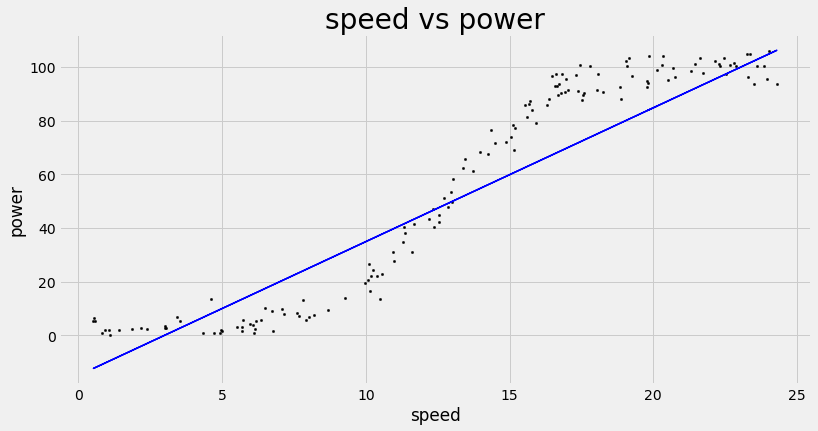

In [84]:
plt.scatter(X_test,y_test,color='black',s=5)
plt.plot(X_test,y_pred,color='blue',linewidth=1.5)
plt.title(f'{ps_c.columns[1]} vs {ps_c.columns[2]}',fontsize=28)
plt.xlabel(f'{ps_c.columns[1]}')
plt.ylabel(f'{ps_c.columns[2]}');

#### Comparison Datframe of Models

In [85]:
compare_df = pd.DataFrame(columns = ['Model Score','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','R-squared'])

In [86]:
compare_df = compare_df.append({'Model Score':m1_score,'Mean Absolute Error':m1_mae,'Mean Squared Error':m1_mse,'Root Mean Squared Error':m1_rmse,'R-squared':m1_r2,'Model':'All Data'},ignore_index=True)
compare_df = compare_df.append({'Model Score':m2_score,'Mean Absolute Error':m2_mae,'Mean Squared Error':m2_mse,'Root Mean Squared Error':m2_rmse,'R-squared':m2_r2,'Model':'Outliers Removed'},ignore_index=True)

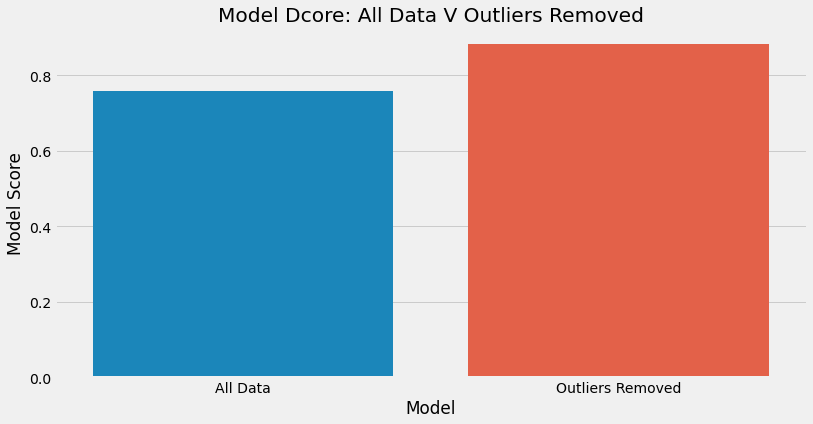

In [103]:
sns.barplot(x='Model',data=compare_df,y='Model Score');
plt.title('Model Dcore: All Data V Outliers Removed');

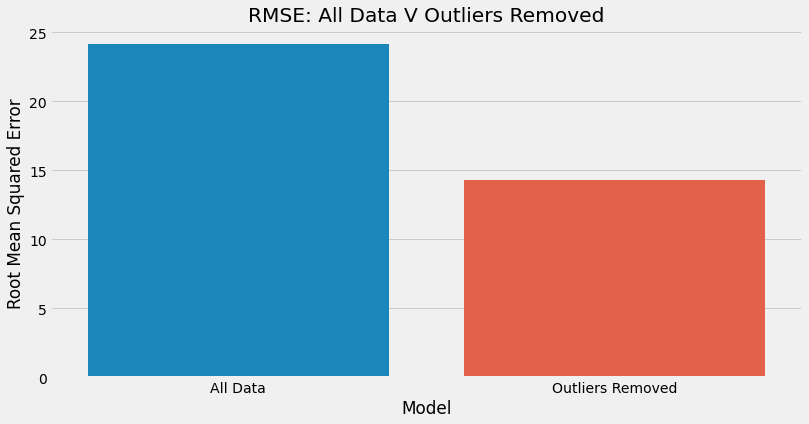

In [104]:
sns.barplot(x='Model',data=compare_df,y='Root Mean Squared Error');
plt.title('RMSE: All Data V Outliers Removed');

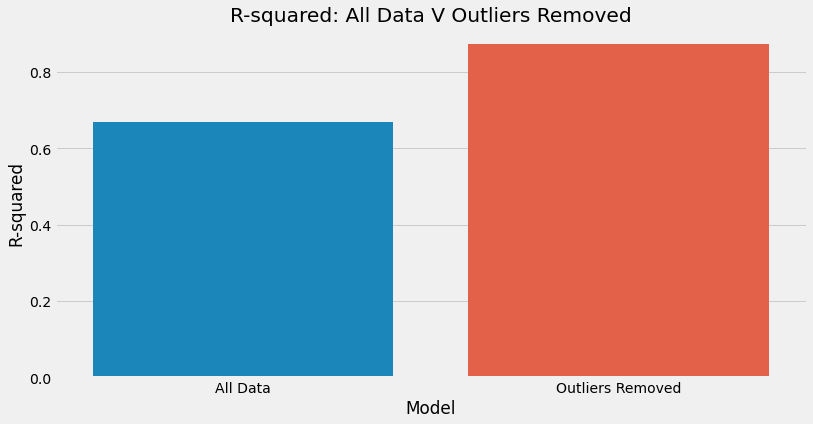

In [105]:
sns.barplot(x='Model',data=compare_df,y='R-squared');
plt.title('R-squared: All Data V Outliers Removed');

## References

* https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

***
# End